In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import os
import metadata







In [11]:
basepath='/media/data/datasets/sign/rwth-boston-104'
basepath='/data/datasets/rwth-boston-104'
videos=os.path.join(basepath,'videoBank/camera0')
video_positions_filepath=os.path.join(basepath,'handpositions/boston104.handpositions.rybach-forster-dreuw-2009-09-25.full.xml')
images_path=os.path.join(basepath,'png-segments')

videos=metadata.parse_videos(video_positions_filepath)
#print(videos)

frames=metadata.parse_videos_to_images(video_positions_filepath)




15746


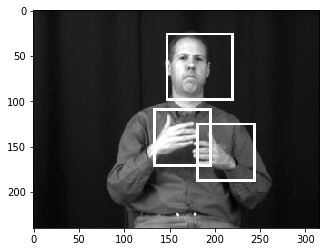

In [16]:

import skimage.io as io
import skimage
import matplotlib.pyplot as plt
import numpy as np
import utils

frame=1030
print(len(frames))

def read_boston104_image(images_path,frame):
    frame_id=frame.frame
    video_id=frame.video
    filename="frame%s_cam0.png" % str(frame_id).zfill(6)
    image_path=os.path.join(images_path,str(video_id).zfill(3),filename)
    image=io.imread(image_path)

    image=(skimage.color.rgb2grey(image)*255).astype(np.uint8)
    w=(0,240,10,326)
    image=image[w[0]:w[1],w[2]:w[3]]
    return image


image=read_boston104_image(images_path,frames[frame])
utils.draw_positions(image,frames[frame].positions)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()